In [1]:
##importing libraries
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import string


##importing the twitter scrapping library
import snscrape.modules.twitter as sntwitter

#import NLP packages
import nltk
from nltk.corpus import stopwords, words        # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize         # to create word tokens
from nltk.stem import WordNetLemmatizer         # to reduce words to orginal form
from nltk import pos_tag                        # For Parts of Speech tagging

In [2]:
import random
import numpy as np

In [3]:
##the query and the timeframe
query = "NationalCathedral since:2017-12-31 until:2022-07-26"

In [4]:
##scrap the data
tweets = [] 
limit = 50000
lang = 'en' #english tweets only
tweet_mode = 'extended'
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.id,tweet.user.username, tweet.date, tweet.content, tweet.user.location])

In [5]:
##call tweets into a dataframe
df = pd.DataFrame(tweets, columns = ['tweet_id','user', 'date', 'tweet', 'location'])

In [6]:
#let's take a look at the dataframe
df

,tweet_id,user,date,tweet,location
0,1551518878899003392,WNCathedral,2022-07-25 10:45:01+00:00,"""Whoever wishes to be great among you must be ...","Washington, D.C."
1,1551479373089230848,MelangeWorlds,2022-07-25 08:08:02+00:00,A @MelangeWorlds production. \n\nSetup for Nat...,"Accra, Ghana"
2,1551298685413326848,joancarroll,2022-07-24 20:10:02+00:00,At Washington National Cathedral Washington DC...,
3,1550509166728552451,egyptmoussaa,2022-07-22 15:52:47+00:00,Looking at all the issues surround #nationalca...,Accra Ghana
4,1550476781421056001,TienMay23,2022-07-22 13:44:05+00:00,Touring Washington DC #Capital #WashingtonMonu...,
...,...,...,...,...,...
2796,950382917393424384,KFFVMom,2018-01-08 15:05:19+00:00,“This #book stimulates #kids curiosity to expl...,Northeast Tennessee
2797,949579498672082944,Jelloteemo,2018-01-06 09:52:49+00:00,🦀🐝🐱Christmas Lights Sydney Australia 2017 - St...,"Cleveland, OH"
2798,948392341617946624,S4MPL31981,2018-01-03 03:15:29+00:00,#staindglass #dc #nationalcathedral #photoofth...,Middleburg va
2799,948357035594149888,KFFVMom,2018-01-03 00:55:11+00:00,#DidYouKnow there are 200 stained glass windo...,Northeast Tennessee


In [7]:
df['date'] = df['date'].dt.tz_localize(None) ##removing timezone so that data can be exported to excel

In [8]:
df ##chceking to see if timezone has been removed

,tweet_id,user,date,tweet,location
0,1551518878899003392,WNCathedral,2022-07-25 10:45:01,"""Whoever wishes to be great among you must be ...","Washington, D.C."
1,1551479373089230848,MelangeWorlds,2022-07-25 08:08:02,A @MelangeWorlds production. \n\nSetup for Nat...,"Accra, Ghana"
2,1551298685413326848,joancarroll,2022-07-24 20:10:02,At Washington National Cathedral Washington DC...,
3,1550509166728552451,egyptmoussaa,2022-07-22 15:52:47,Looking at all the issues surround #nationalca...,Accra Ghana
4,1550476781421056001,TienMay23,2022-07-22 13:44:05,Touring Washington DC #Capital #WashingtonMonu...,
...,...,...,...,...,...
2796,950382917393424384,KFFVMom,2018-01-08 15:05:19,“This #book stimulates #kids curiosity to expl...,Northeast Tennessee
2797,949579498672082944,Jelloteemo,2018-01-06 09:52:49,🦀🐝🐱Christmas Lights Sydney Australia 2017 - St...,"Cleveland, OH"
2798,948392341617946624,S4MPL31981,2018-01-03 03:15:29,#staindglass #dc #nationalcathedral #photoofth...,Middleburg va
2799,948357035594149888,KFFVMom,2018-01-03 00:55:11,#DidYouKnow there are 200 stained glass windo...,Northeast Tennessee


In [9]:
##export to excel
df.to_excel(r'C:\Users\INNO\Documents\National cathedral.xlsx', index = False, header = True) ##export data to excel

Let's clean this up!

In [10]:
df.shape

(2801, 5)

In [11]:
##checking for duplicated tweets
df.duplicated(subset = 'tweet_id').sum()

0

In [12]:
##checking for null values
df.isna().any()

tweet_id    False
user        False
date        False
tweet       False
location    False
dtype: bool

In [13]:
##checking for null values
df.isnull().sum()

tweet_id    0
user        0
date        0
tweet       0
location    0
dtype: int64

In [14]:
##double checking for null values
df.head(10)

,tweet_id,user,date,tweet,location
0,1551518878899003392,WNCathedral,2022-07-25 10:45:01,"""Whoever wishes to be great among you must be ...","Washington, D.C."
1,1551479373089230848,MelangeWorlds,2022-07-25 08:08:02,A @MelangeWorlds production. \n\nSetup for Nat...,"Accra, Ghana"
2,1551298685413326848,joancarroll,2022-07-24 20:10:02,At Washington National Cathedral Washington DC...,
3,1550509166728552451,egyptmoussaa,2022-07-22 15:52:47,Looking at all the issues surround #nationalca...,Accra Ghana
4,1550476781421056001,TienMay23,2022-07-22 13:44:05,Touring Washington DC #Capital #WashingtonMonu...,
5,1550431716610826240,WNCathedral,2022-07-22 10:45:01,“Mary Magdalene went and announced to the disc...,"Washington, D.C."
6,1550186598024749056,PresidentsVisit,2022-07-21 18:31:00,"All of Washington, from atop the Cathedral 💒🪦🦅...","Mesa, AZ"
7,1550181268561793025,PresidentsVisit,2022-07-21 18:09:50,Re-Visiting the Presidents! Woodrow Wilson’s t...,"Mesa, AZ"
8,1550177297298325510,PresidentsVisit,2022-07-21 17:54:03,More from the Woodrow Wilson Bay in National C...,"Mesa, AZ"
9,1550177031933001729,PresidentsVisit,2022-07-21 17:52:59,Re-Visiting the Presidents! Woodrow Wilson’s t...,"Mesa, AZ"


In [15]:
##results from code above and below show there are missing values in the location column
df['location'].head(10)

0    Washington, D.C.
1        Accra, Ghana
2                    
3         Accra Ghana
4                    
5    Washington, D.C.
6            Mesa, AZ
7            Mesa, AZ
8            Mesa, AZ
9            Mesa, AZ
Name: location, dtype: object

In [16]:
df['location'] = df['location'].replace(r'^\s*$', np.nan, regex=True)

In [17]:
##replace null values with 'No location'
df['location'] = df['location'].fillna('No location')

In [18]:
##verify if null values have been replaced
df['location'].head(10)

0    Washington, D.C.
1        Accra, Ghana
2         No location
3         Accra Ghana
4         No location
5    Washington, D.C.
6            Mesa, AZ
7            Mesa, AZ
8            Mesa, AZ
9            Mesa, AZ
Name: location, dtype: object

In [19]:
#create a function to clean up the tweets
def cleanTweet(tweet):
    tweet = tweet.lower() ##word frequency to understand how often words are used
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) ##remove @ mentions
    tweet = re.sub(r'#', '', tweet) #removing the '#' symbol
    tweet = re.sub(r'RT[\s]+', '', tweet) #removing RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet) #removing hyperlinks
    
    return tweet

In [20]:
df['tweet']=df['tweet'].apply(cleanTweet)

In [21]:
df.head(10)

,tweet_id,user,date,tweet,location
0,1551518878899003392,WNCathedral,2022-07-25 10:45:01,"""whoever wishes to be great among you must be ...","Washington, D.C."
1,1551479373089230848,MelangeWorlds,2022-07-25 08:08:02,a production. \n\nsetup for national cathedra...,"Accra, Ghana"
2,1551298685413326848,joancarroll,2022-07-24 20:10:02,at washington national cathedral washington dc...,No location
3,1550509166728552451,egyptmoussaa,2022-07-22 15:52:47,looking at all the issues surround nationalcat...,Accra Ghana
4,1550476781421056001,TienMay23,2022-07-22 13:44:05,touring washington dc capital washingtonmonume...,No location
5,1550431716610826240,WNCathedral,2022-07-22 10:45:01,“mary magdalene went and announced to the disc...,"Washington, D.C."
6,1550186598024749056,PresidentsVisit,2022-07-21 18:31:00,"all of washington, from atop the cathedral 💒🪦🦅...","Mesa, AZ"
7,1550181268561793025,PresidentsVisit,2022-07-21 18:09:50,re-visiting the presidents! woodrow wilson’s t...,"Mesa, AZ"
8,1550177297298325510,PresidentsVisit,2022-07-21 17:54:03,more from the woodrow wilson bay in national c...,"Mesa, AZ"
9,1550177031933001729,PresidentsVisit,2022-07-21 17:52:59,re-visiting the presidents! woodrow wilson’s t...,"Mesa, AZ"


In [22]:
# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet) if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [23]:
#Create a function to get the subjectivity
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [24]:
#Create a function to get the polarity
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [25]:
#Create two new columns
def cleantweet(tweet):
    df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
    df['Polarity'] = df['tweet'].apply(getPolarity)

In [26]:
##show new dataframe with the new columns
df

,tweet_id,user,date,tweet,location
0,1551518878899003392,WNCathedral,2022-07-25 10:45:01,"""whoever wishes to be great among you must be ...","Washington, D.C."
1,1551479373089230848,MelangeWorlds,2022-07-25 08:08:02,a production. \n\nsetup for national cathedra...,"Accra, Ghana"
2,1551298685413326848,joancarroll,2022-07-24 20:10:02,at washington national cathedral washington dc...,No location
3,1550509166728552451,egyptmoussaa,2022-07-22 15:52:47,looking at all the issues surround nationalcat...,Accra Ghana
4,1550476781421056001,TienMay23,2022-07-22 13:44:05,touring washington dc capital washingtonmonume...,No location
...,...,...,...,...,...
2796,950382917393424384,KFFVMom,2018-01-08 15:05:19,“this book stimulates kids curiosity to explor...,Northeast Tennessee
2797,949579498672082944,Jelloteemo,2018-01-06 09:52:49,🦀🐝🐱christmas lights sydney australia 2017 - st...,"Cleveland, OH"
2798,948392341617946624,S4MPL31981,2018-01-03 03:15:29,staindglass dc nationalcathedral photooftheday...,Middleburg va
2799,948357035594149888,KFFVMom,2018-01-03 00:55:11,didyouknow there are 200 stained glass window...,Northeast Tennessee


In [27]:
def cleanTweet(tweet):
    tweet = tweet.lower()  
    
        # Remove stopwords 
    tweet_tokens = word_tokenize(tweet)                                 # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

        # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    return "".join(unpunctuated_words)
    
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ['2020', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt',
                    'havent', 'hasnt', 'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent',
                    'mustnt', '’', '...', '..', '.', '.....', '....', 'been…', 'one', 'two',
                    'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'aht',
                    've', 'next', 'ng','gh','GHC', 'million', 'RF','National', 'Cathedral', 
                   'Secretariat','national', 'cathedral']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()  # all words in English language

In [28]:
print(cleanTweet("The National Cathedral is a shamful waste of the public purse"))

waste public purse


In [29]:
df['cleaned_tweet'] = df['tweet'].apply(cleanTweet)
df['tweet_adjectives'] = df['cleaned_tweet'].apply(getAdjectives)

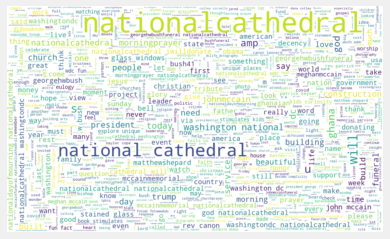

In [30]:
#plot the word cloud
allWords = ' '.join( [twts for twts in df['tweet']])
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 600, 
                      random_state = 3, max_words = 1500).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

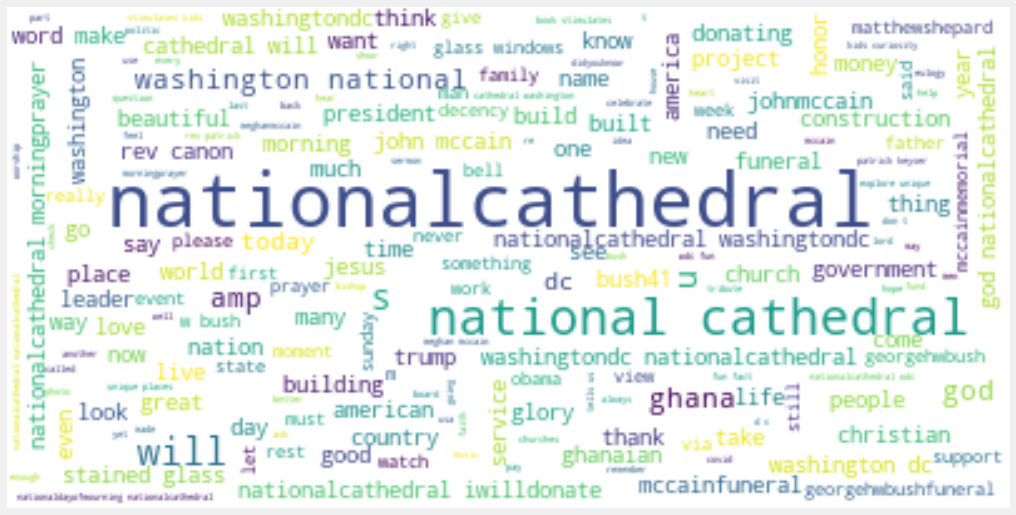

In [31]:
tweets_wordcloud = ''.join([twts for twts in df['tweet']])

# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=2000)

# generate the word cloud
twitter_wc.generate(tweets_wordcloud)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(16)  # set width
fig.set_figheight(20)  # set height

plt.imshow(twitter_wc.recolor(random_state=3),interpolation="bilinear")
plt.axis('off')
plt.show()

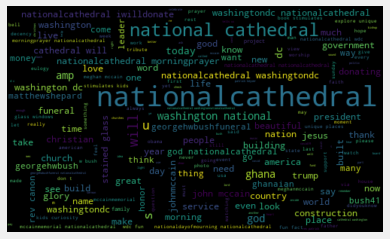

In [32]:
#plot the word cloud
allWords = ' '.join( [twts for twts in df['tweet']] )
wordcloud = WordCloud(width = 500, height = 300, random_state = 30).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()